In [1]:
import sys, os
from os.path import dirname, join
module_path = join(dirname(os.getcwd()), 'src')
if module_path not in sys.path:
    sys.path.append(module_path)

from SR_model import SR
from plot_utils import plot_trajectory, plot_maze_stats
from utils import calculate_visit_frequency

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
np.random.seed(40)
N_BOUTS=70
agnt = SR()
# ALPHA, BETA, GAMMA, LAMBDA = [0.3, 2, 0.89, 0.8]
ALPHA, BETA, GAMMA, LAMBDA = [0.3, 12, 0.998, 0.8]
success, stats = agnt.simulate(0, [ALPHA, BETA, GAMMA, LAMBDA], max_length=10000, n_bouts_to_generate=N_BOUTS, debug=True)

>>> Simulating: 0 [0.3, 12, 0.998, 0.8] 10000 70
>>> module name: SR_model parent process id: 922 process id: 1205
alpha 0.3, beta 12.0, gamma 1.00, lambda 0.8, agentId 0
0
Reward consumed. Trial  7
Home reached. Trial  14
1
Reward consumed. Trial  295
Home reached. Trial  304
2
Reward consumed. Trial  293
Home reached. Trial  300
3
Reward consumed. Trial  295
Home reached. Trial  302
4
Reward consumed. Trial  295
Home reached. Trial  302
5
Reward consumed. Trial  295
Home reached. Trial  302
6
Reward consumed. Trial  295
Home reached. Trial  302
7
Reward consumed. Trial  295
Home reached. Trial  302
8
Reward consumed. Trial  295
Home reached. Trial  302
9
Reward consumed. Trial  295
Home reached. Trial  302
10
Home reached. Trial  2
11
Reward consumed. Trial  293
Home reached. Trial  300
12
Reward consumed. Trial  295
Home reached. Trial  302
13
Reward consumed. Trial  295
Home reached. Trial  302
14
Reward consumed. Trial  295
Home reached. Trial  302
15
Reward consumed. Trial  295
H

In [3]:
stats["episodes_positions"]

[[0, 2, 6, 13, 28, 57, 116, 57, 28, 13, 6, 2, 0, 127],
 [0,
  2,
  6,
  13,
  28,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  116,
  57,
  

In [4]:
[len(stats["episodes_positions"][i]) for i in range(len(stats["episodes_positions"]))]

[14,
 304,
 300,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 2,
 300,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 304,
 300,
 304,
 300,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 304,
 300,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 2,
 300,
 302,
 302]

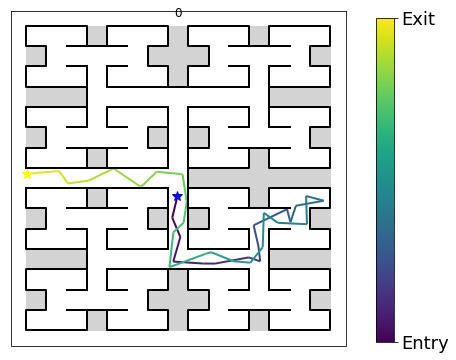

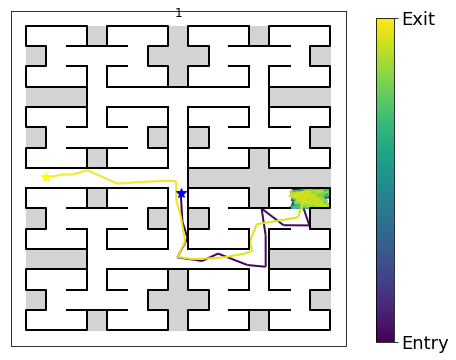

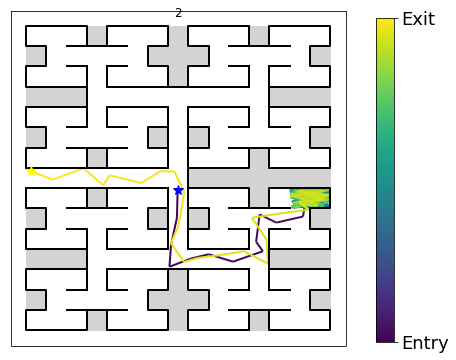

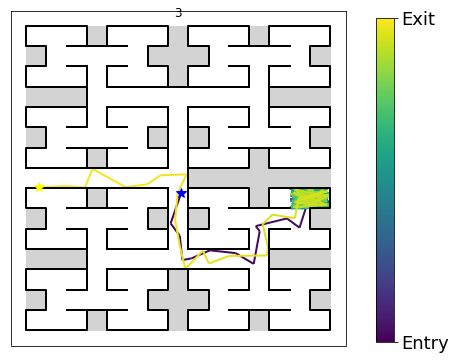

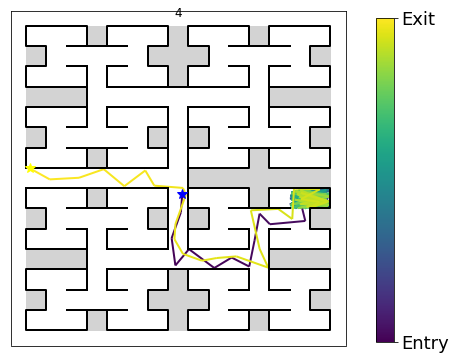

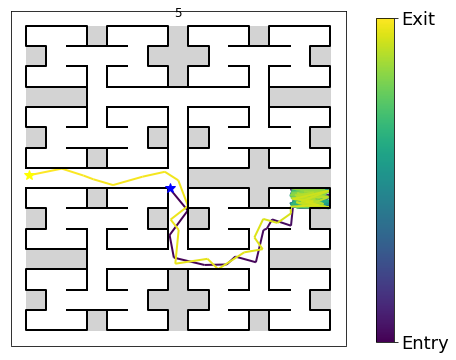

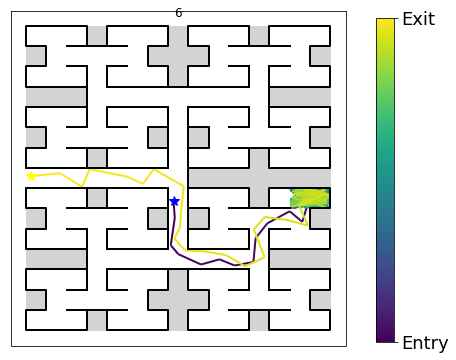

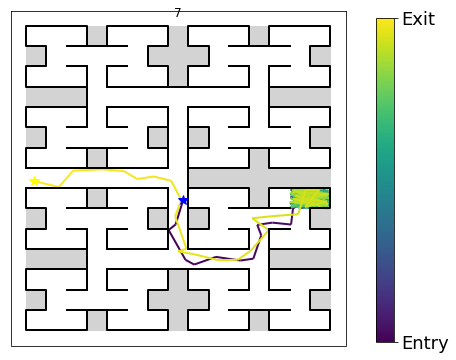

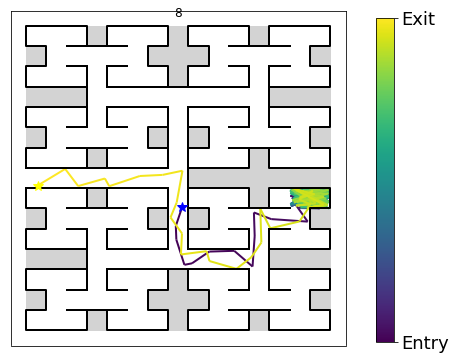

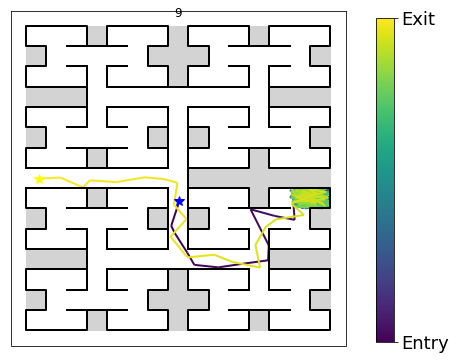

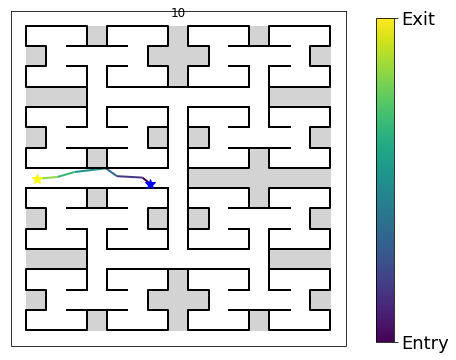

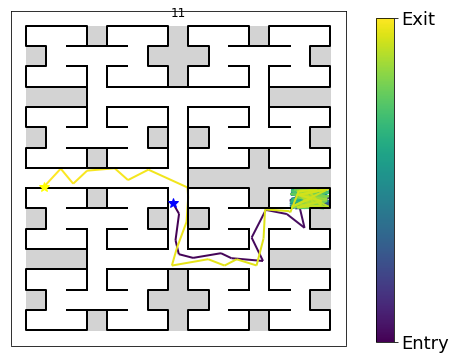

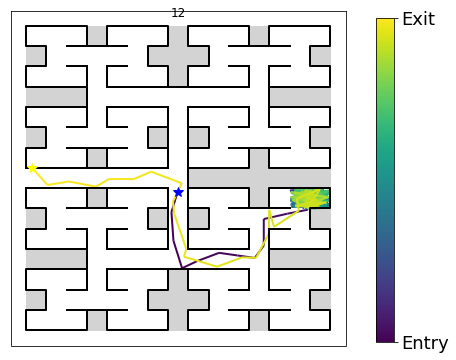

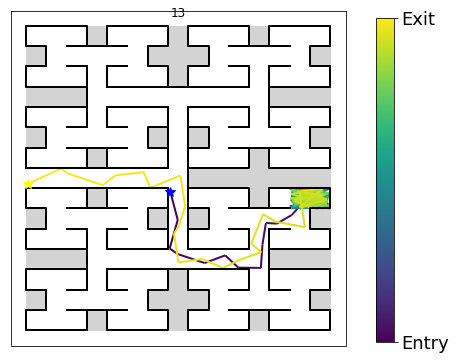

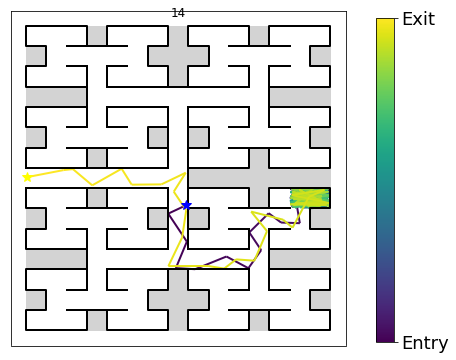

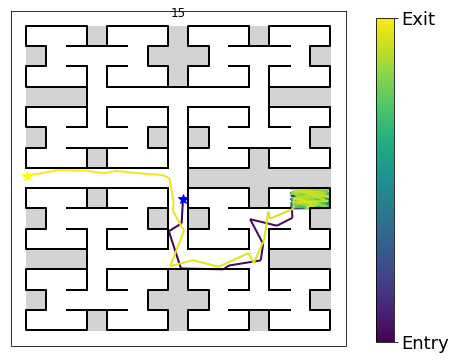

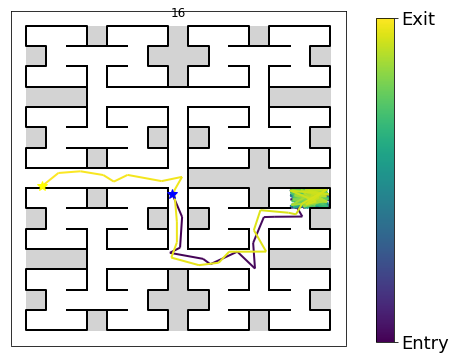

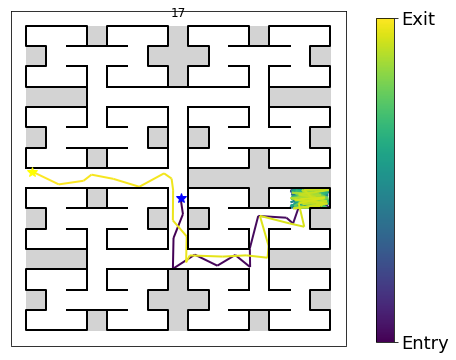

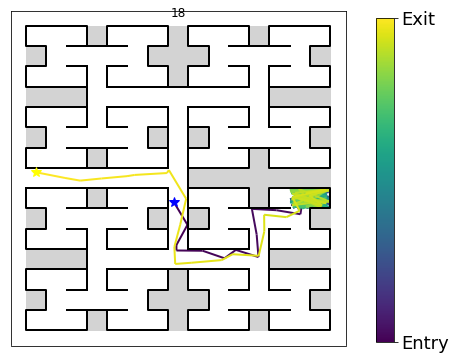

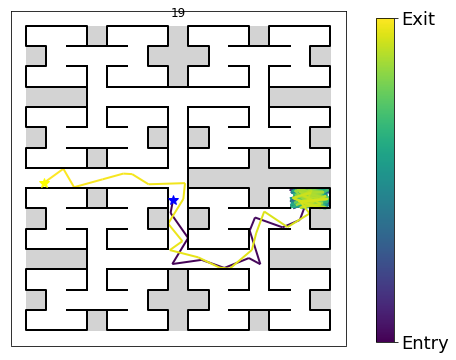

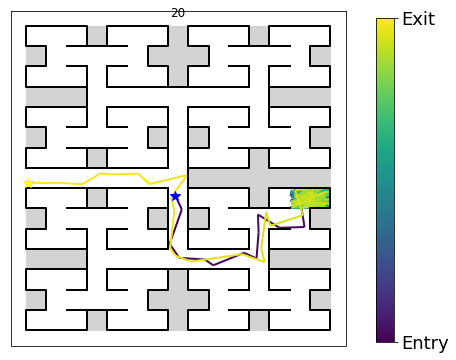

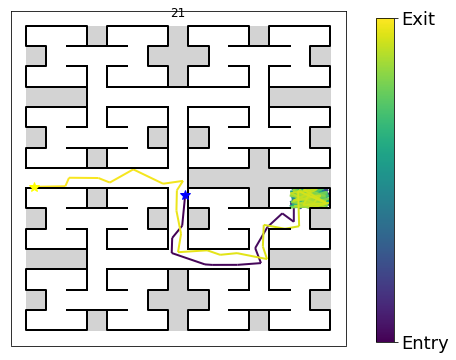

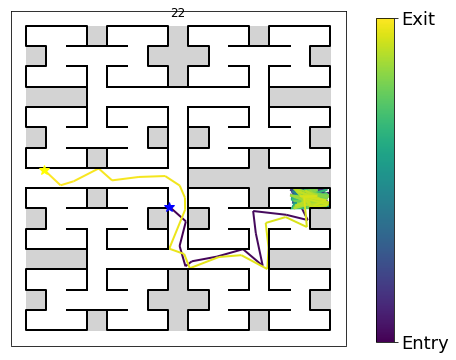

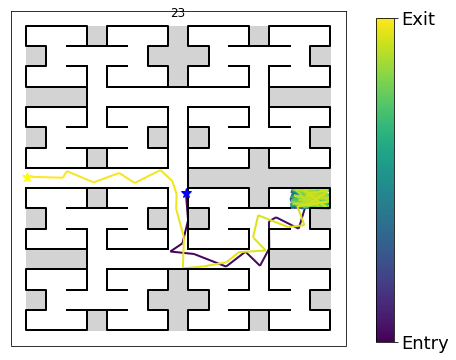

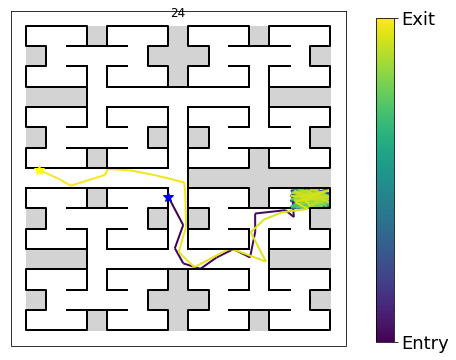

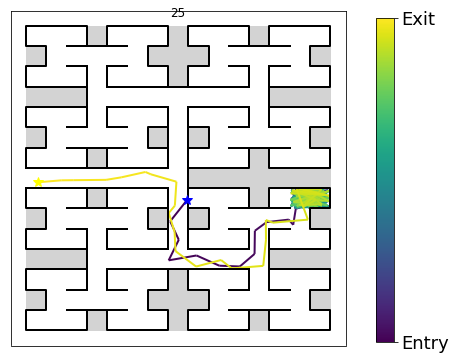

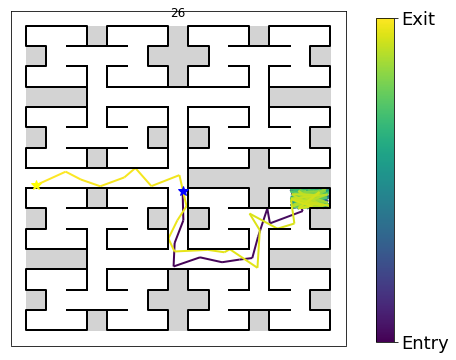

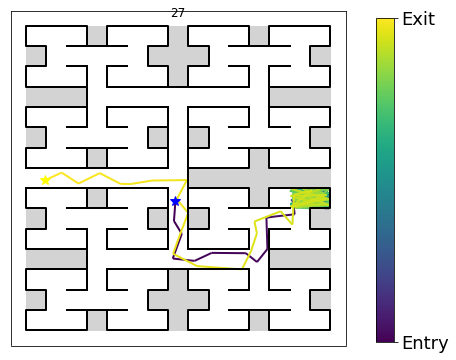

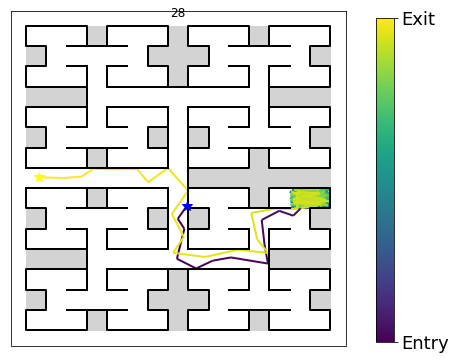

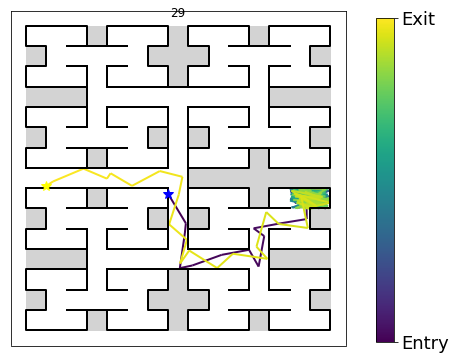

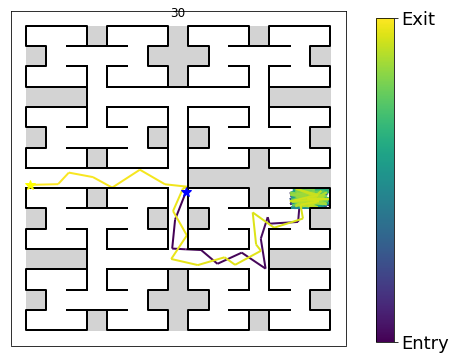

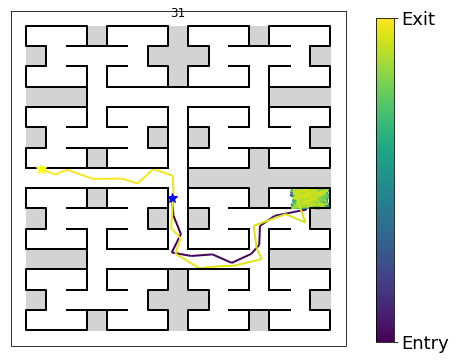

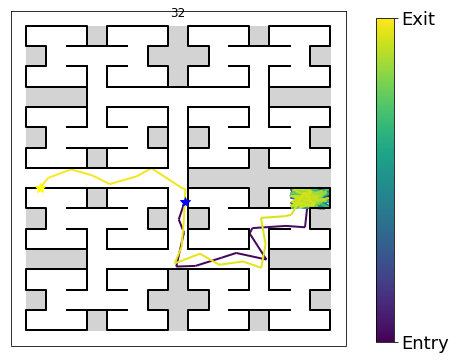

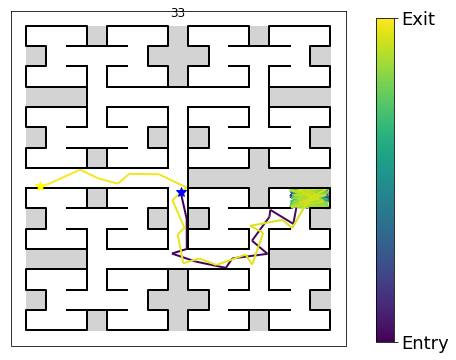

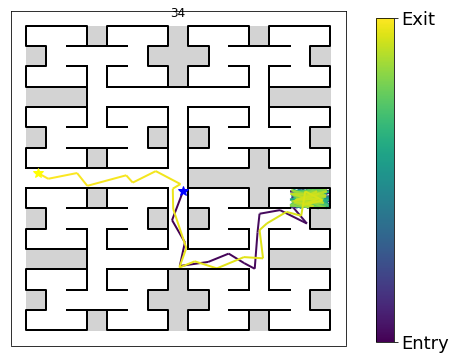

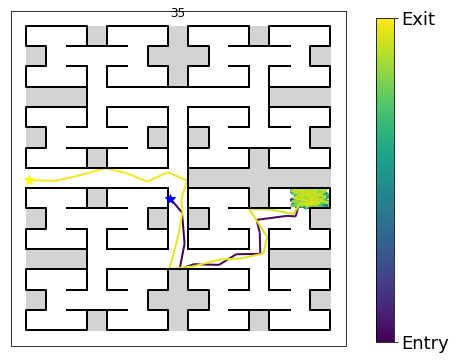

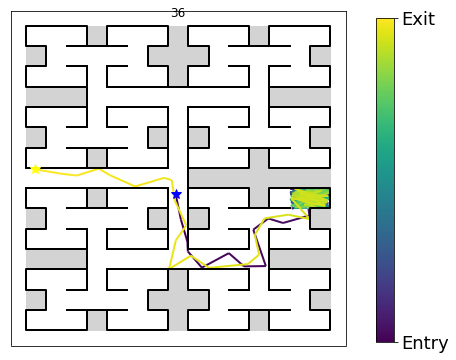

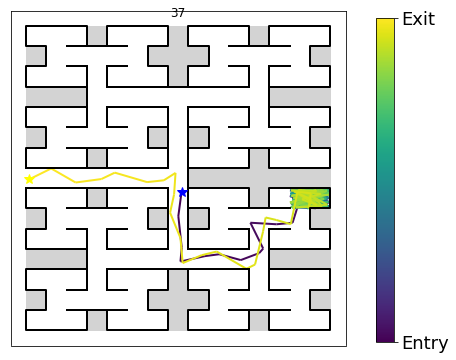

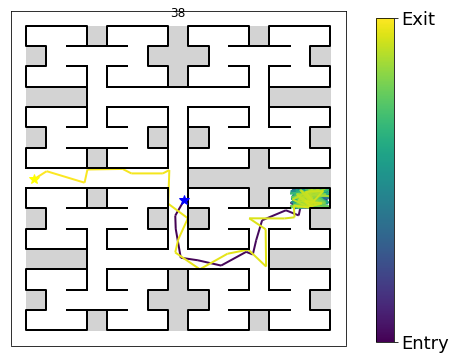

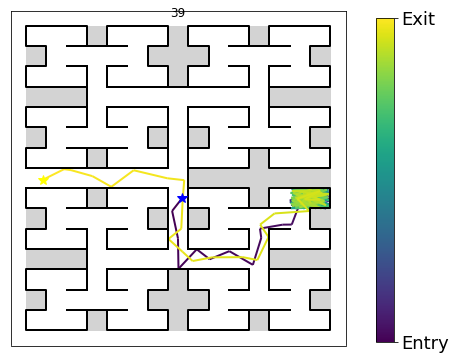

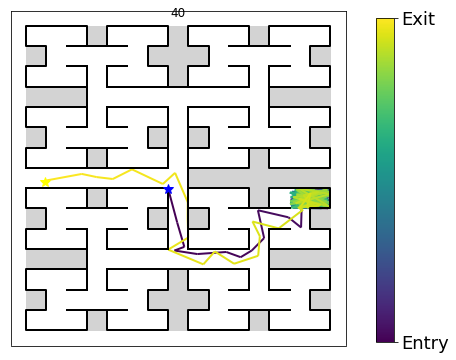

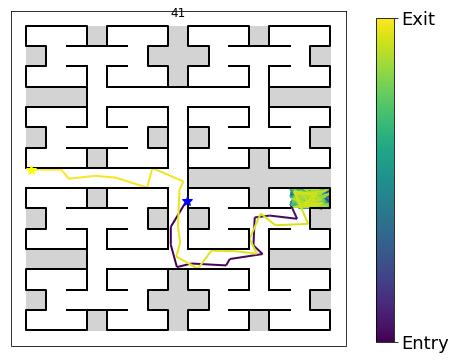

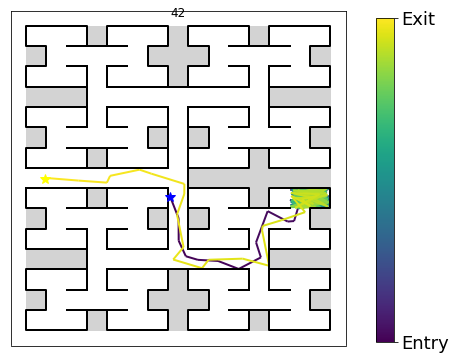

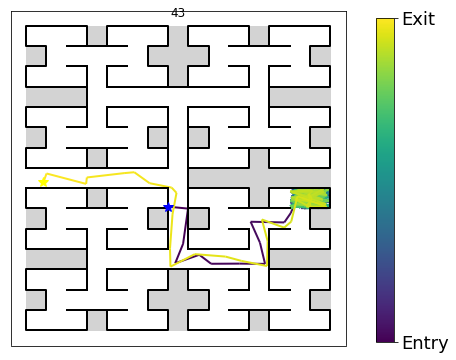

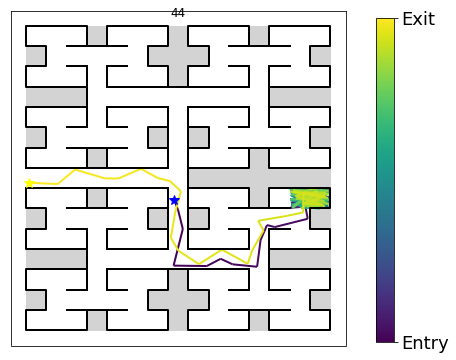

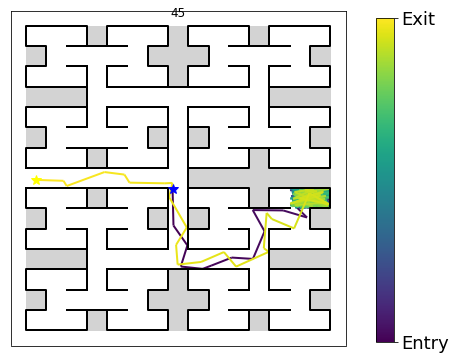

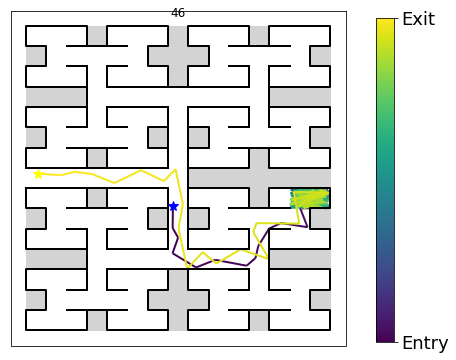

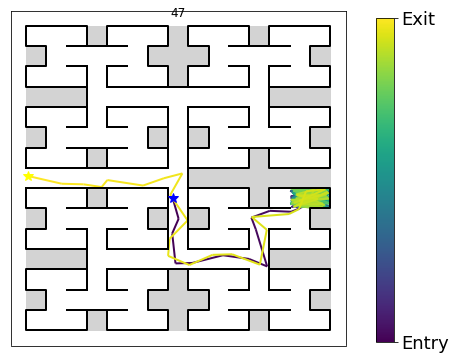

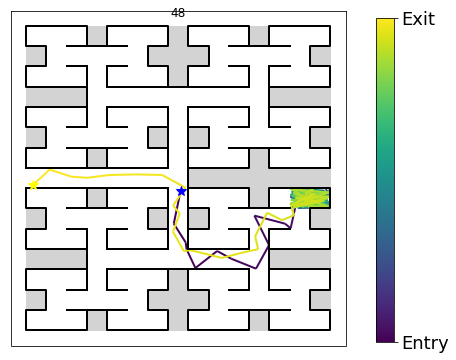

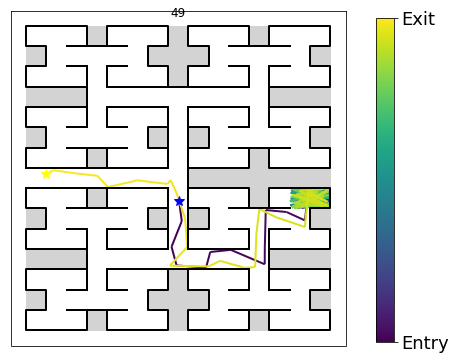

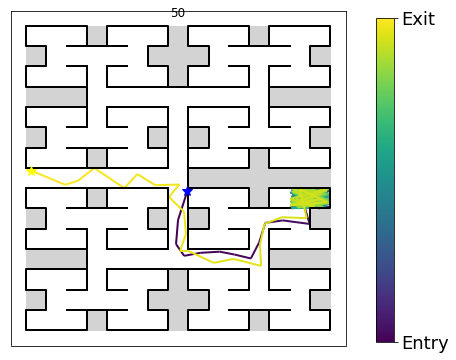

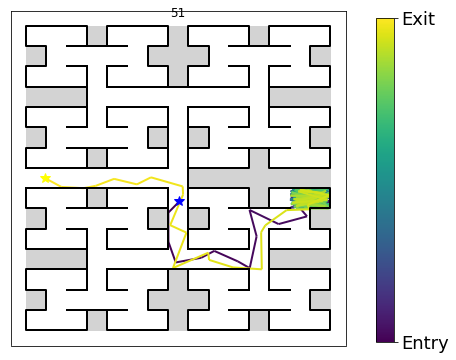

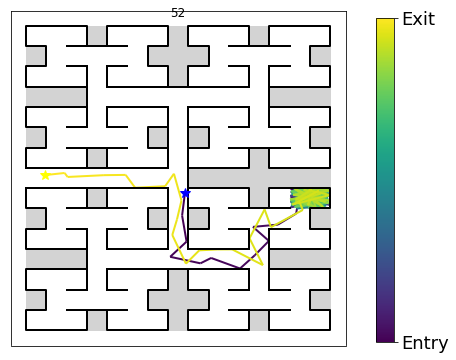

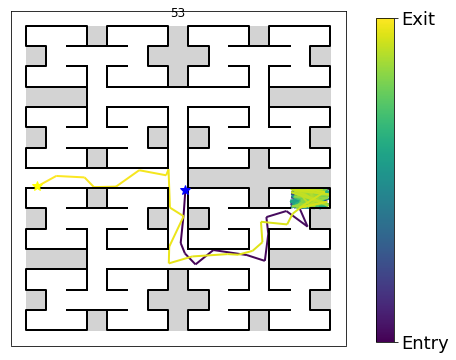

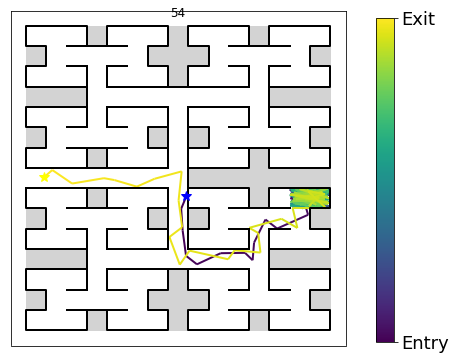

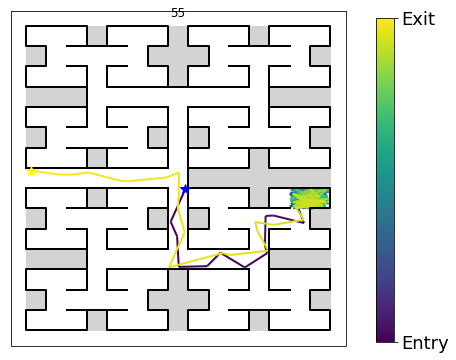

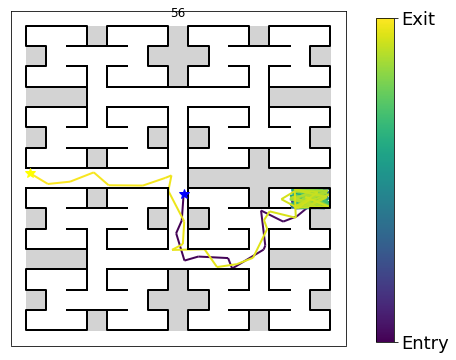

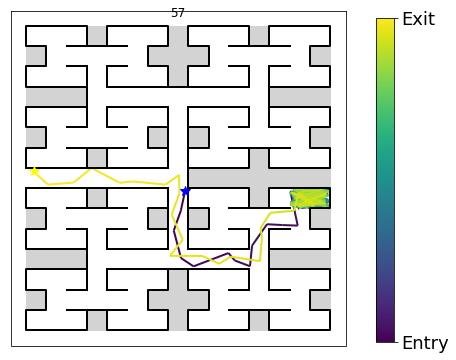

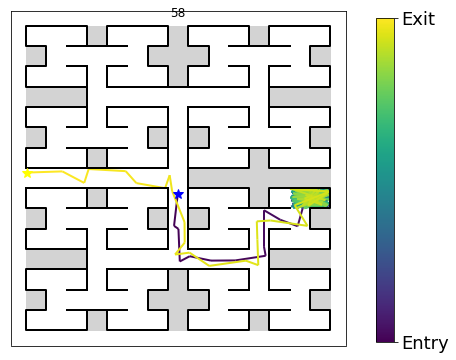

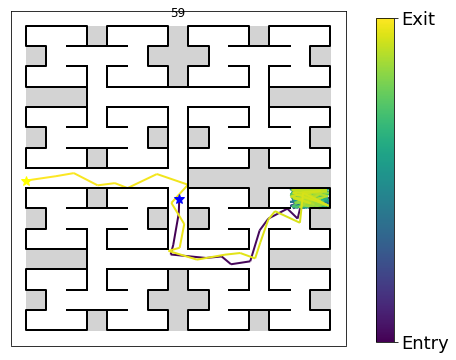

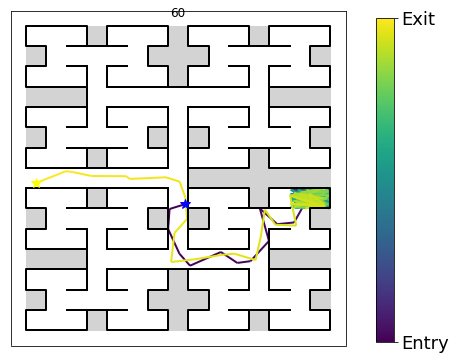

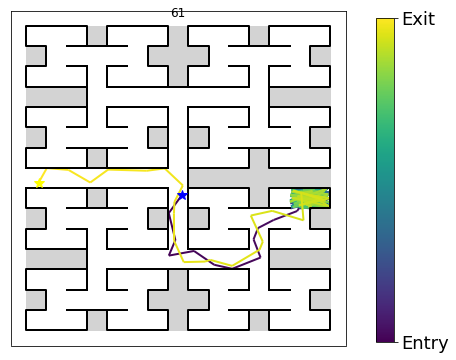

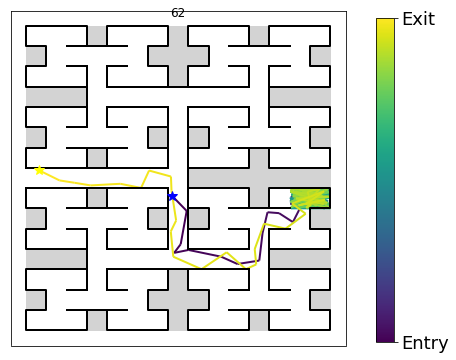

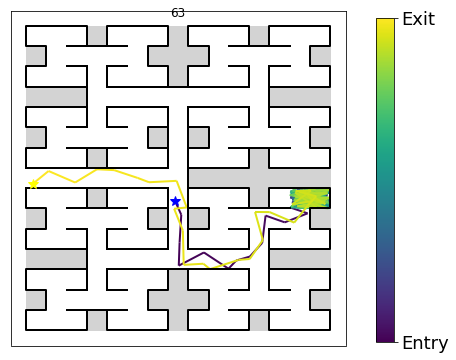

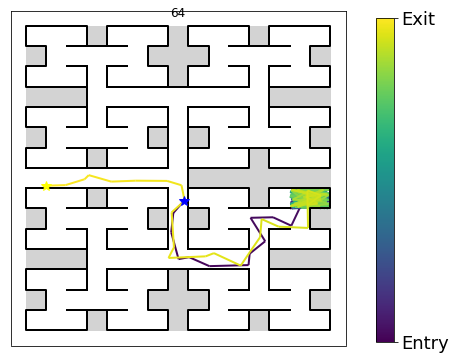

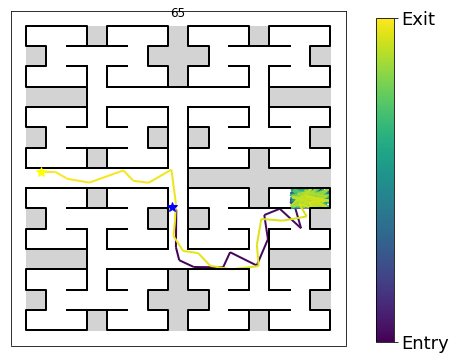

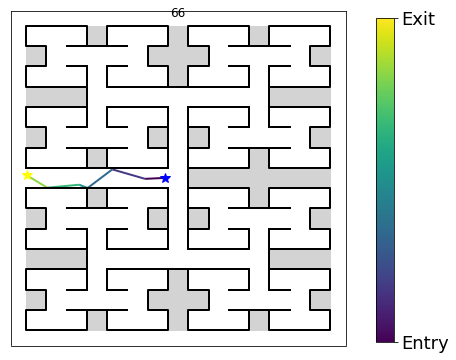

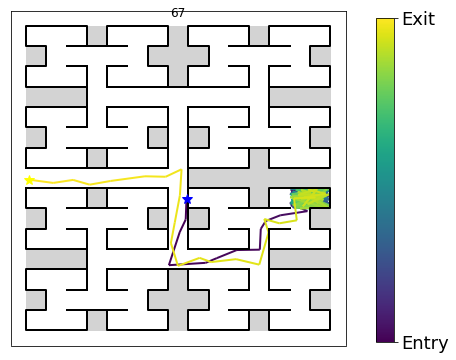

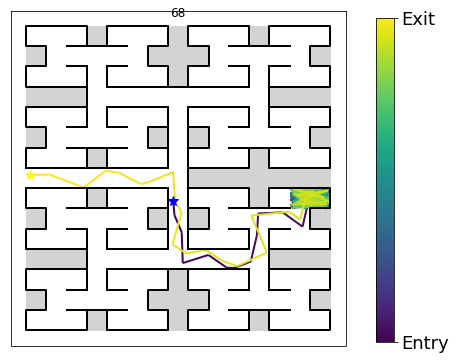

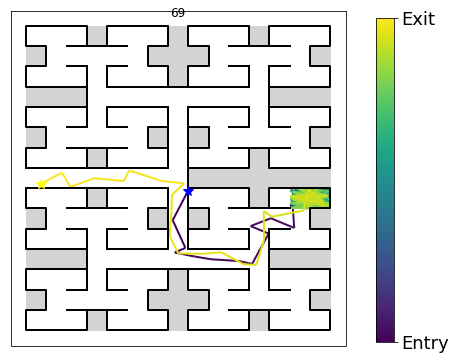

In [5]:
# for i in range(N_BOUTS):
#     plot_trajectory(stats["episodes_positions"], figtitle=i, episode_idx=i, figsize=(5,5));

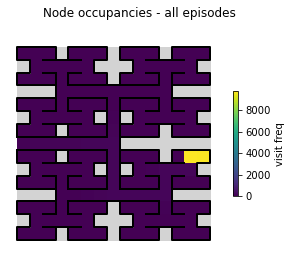

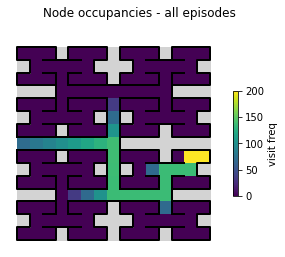

In [31]:
plot_maze_stats(calculate_visit_frequency(stats["episodes_positions"]),
                colorbar_label="visit freq", figtitle='Node occupancies - all episodes')

plot_maze_stats(calculate_visit_frequency(stats["episodes_positions"]),
                colorbar_label="visit freq", figtitle='Node occupancies - all episodes', vmax=200);

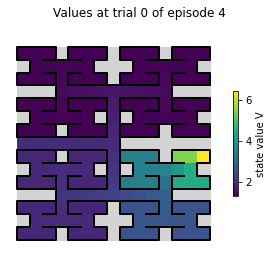

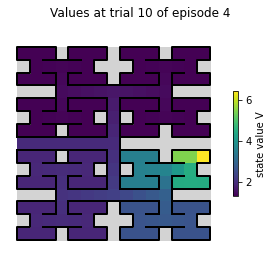

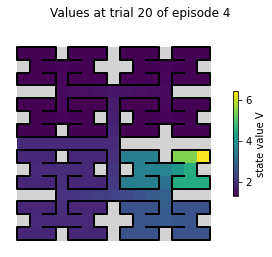

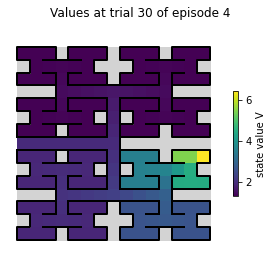

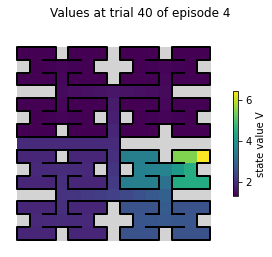

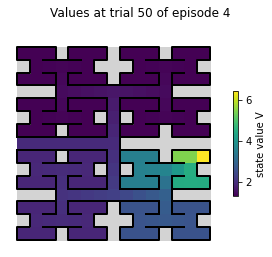

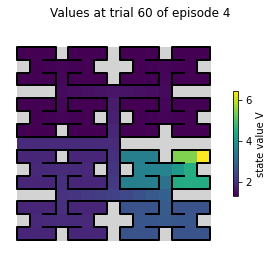

In [7]:
episode_i=4
n_trials = len(stats["value_hists"][episode_i])
for trial in range(0, n_trials, 10):
    plot_maze_stats(stats["value_hists"][episode_i][trial], colorbar_label="state value V",
                    figtitle=f"Values at trial {trial} of episode {episode_i}")
    if trial>50:
        break

(0.0, 1.0)

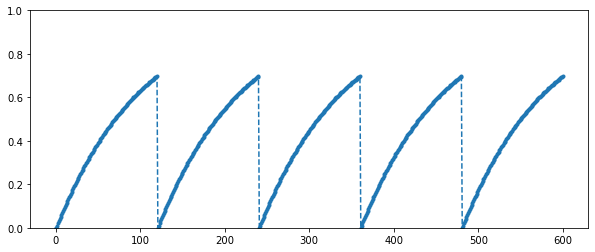

In [8]:
x=0
tau=.01
reset_interval=120
x_hist=[x]
N_STEPS = 600
for i in range(N_STEPS):
    x = x + tau*(1-x)
    if i%reset_interval==0:
        x=0
    x_hist.append(x)

figure(figsize=(10,4))
plot(range(N_STEPS+1), x_hist, '.--')
ylim(0, 1)

### Waterport visit intervals after rwd delivery

In [9]:
from utils import convert_episodes_to_traj_class, get_wp_visit_times_and_rwd_times, \
                    create_list_waterport_visits_in_between_rwds

Text(0.5, 0, 'Time(s)')

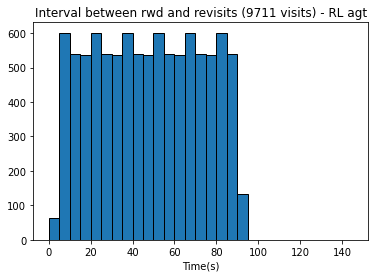

In [28]:
# all_animals = []
# for agt in agts:

# tf=LoadTraj(agt+'-tf')
    
nickname = "RL agt"
tf = convert_episodes_to_traj_class(stats["episodes_positions"], stats["episodes_states"])

times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)

    
all_waterport_visits = create_list_waterport_visits_in_between_rwds(times_to_waterport_visits, times_to_rwd)
    
    

cum_times_wp_visits = []
for wp_visits_i, wp_visits_bw_rwds in enumerate(all_waterport_visits[1:]): # disconsider waterport visits before the first reward
    cum_times_wp_visits.append(wp_visits_bw_rwds-times_to_rwd[wp_visits_i])

plt.figure()
plt.title("Interval between rwd and revisits (%d visits) - %s" % (len(np.concatenate(cum_times_wp_visits)),nickname))
plt.hist(np.concatenate(cum_times_wp_visits), bins=arange(0,150, 5), ec='black');
plt.xlabel("Time(s)")


#     all_animals.append(np.concatenate(cum_times_wp_visits))

# ## FOR ALL ANIMALS
# plt.figure()
# plt.hist(clip(concatenate(all_animals), 0, 450), bins=arange(0,460, 10), ec='black')
# plt.title("Interval between rwd and revisits - all animals")
# plt.xlabel("Time(s)")

In [17]:
from plot_utils import plot_nodes_vs_time

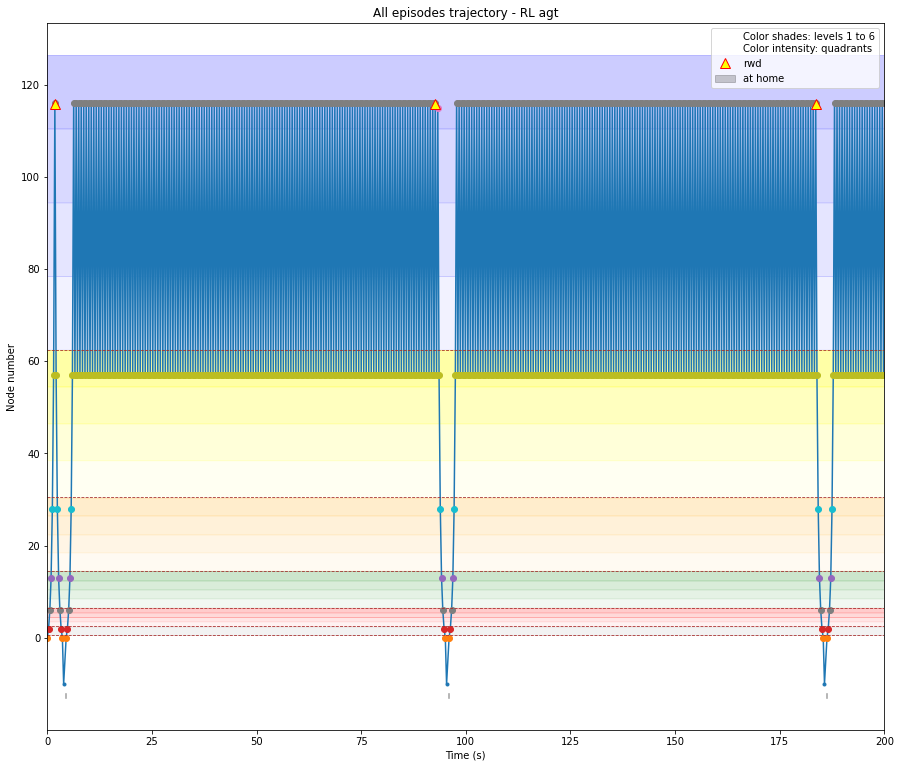

In [35]:
init_time=0
time_window=200
plot_nodes_vs_time(tf, colored_markers=True, separate_quadrants=True, \
                   custom_title="All episodes trajectory - %s" % nickname, init_time=init_time, time_window=time_window);